# Projeto 1 - Ciência dos Dados

Nome: Isadora Stigliani Dalberto

**GitHub:** https://github.com/Doradalberto/APS_Isadora_Dalberto

**Base de Dados:** https://www.gapminder.org/data/documentation/gd004/ &
                   https://data.worldbank.org/indicator/NY.GDP.MKTP.KD

## Pergunta(s):

Os países que entraram no SADC (Comunidade para o Desenvolvimento da África Austral) em 1992 tiveram um aumento no seu PIB superior aos países da África que não entraram? Além do PIB, a expectativa de vida também aumentou proporcionalmente ao PIB?

**Anos de interesse:**

>de 1971 até 1991 - 20 anos antes de existir o SADC
 
>de 1992 até 2010 - 20 anos após o SADC existir

## Hipótese:

Os países que entraram na SADC tiveram seu PIB elevado pois, por ser uma organização que visa o crescimento econômico dos países participantes, há uma maior exportação e melhoria na economia do país como um todo.** -- OLHAR DENOVO ESSA HIPOTESE!

In [259]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\dorad\OneDrive\Documentos\Insper\2 Semestre\2.CienDados\Projeto1\APS_Isadora_Dalberto


**Lê os arquivos que vamos utilizar no projeto:**

In [261]:
dados = pd.read_excel('total_gdp_us_inflation_adjusted.xlsx')

In [262]:
vida = pd.read_excel('life_expectancy_years.xlsx')

**Altera o índice das tabelas:**

In [263]:
dados_indice = dados.set_index("country")
vida_indice = vida.set_index("country")

**Países pertencentes ao Bloco SADC (áfrica austral):**

In [264]:
af_aus = ["Angola", "South Africa", "Botswana", "Congo, Dem. Rep.", "Lesotho", "Madagascar", "Malawi", "Mauritius", "Mozambique", "Namibia", "Swaziland", "Tanzania", "Zambia", "Zimbabwe"]

**Paises da áfrica que não pertencem ao Bloco SADC:**

In [265]:
af_nao_aus = ["Benin", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", "Central African Republic", "Chad", "Congo, Rep.", "Djibouti", "Eritrea", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Liberia", "Mali", "Niger", "Nigeria", "Rwanda", "Senegal", "Seychelles", "Sierra Leone", "Sudan", "Togo", "Uganda" ]

**Listas de Anos**

In [266]:
anos = [1971, 1972,1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
anos_1 = [1971, 1972,1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991]
anos_2 = [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

**Criação da Coluna AF_AUS e AF_NAO_AUS**

In [319]:
dados_indice.loc[:, "AF_AUS"] = 0      #criar uma coluna chamada AF_AUS e falar que todos os países são 0
dados_indice.loc[af_aus,"AF_AUS"]=1    #falar que todos os países da lista af_aus recebem o valor de 1 na coluna AF_AUS

dados_indice.loc[:, "AF_NAO_AUS"] = 0     #criar uma coluna chamada AF_NAO_AUS e falar que todos os países são 0
dados_indice.loc[af_nao_aus,"AF_NAO_AUS"]=1   #falar que todos os países da lista af_nao_aus recebem o valor de 1 na coluna AF_NAO_AUS

vida_indice.loc[:, "AF_AUS"] = 0
vida_indice.loc[af_aus,"AF_AUS"]=1

vida_indice.loc[:, "AF_NAO_AUS"] = 0
vida_indice.loc[af_nao_aus,"AF_NAO_AUS"]=1

**Loc selecionando os países**

In [321]:
dados_af_aus = dados_indice.loc[af_aus]     #PIB de todos os paises que sao do SADC

dados_af_nao_aus = dados_indice.loc[af_nao_aus]     #PIB de todos os paises que sao da africa mas nao sao da SADC

vida_af_aus = vida_indice.loc[af_aus]     #ExpVida de todos os paises que sao do SADC

vida_af_nao_aus = vida_indice.loc[af_nao_aus]     #ExpVida de todos os paises que sao da africa mas nao sao da SADC

africa = af_aus + af_nao_aus     #definição do que é africa = soma das duas listas

dados_africa = dados_indice.loc[africa]     #PIB de todos os paises da áfrica

vida_africa = vida_indice.loc[africa]     #ExpVida de todos os paises da áfrica

In [270]:
transpor_aus = dados_af_aus.transpose()
transpor_quant_aus = transpor_aus[:-2]

aus_anos1 = transpor_quant_aus.loc[(transpor_quant_aus.index>1970) & (transpor_quant_aus.index<1992),:].transpose()
soma_aus_anos1 = aus_anos1.sum() #soma POR ANO

aus_anos2 = transpor_quant_aus.loc[(transpor_quant_aus.index>1991) & (transpor_quant_aus.index<2013),:].transpose()
soma_aus_anos2 = aus_anos2.sum() #soma POR ANO

aus_anos_total = transpor_quant_aus.loc[(transpor_quant_aus.index>1970) & (transpor_quant_aus.index<2013),:].transpose()
soma_aus_anos_total = aus_anos_total.sum() ##

In [271]:
transpor_nao_aus = dados_af_nao_aus.transpose()
transpor_quant_nao_aus = transpor_nao_aus[:-2]

nao_aus_anos1 = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1970) & (transpor_quant_nao_aus.index<1992),:].transpose()
soma_nao_aus_anos1 = nao_aus_anos1.sum()

nao_aus_anos2 = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1991) & (transpor_quant_nao_aus.index<2013),:].transpose()
soma_nao_aus_anos2 = nao_aus_anos2.sum()

nao_aus_anos_total = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1970) & (transpor_quant_nao_aus.index<2013),:].transpose()
soma_nao_aus_anos_total = nao_aus_anos_total.sum() ##

In [272]:
transpor = dados_africa.transpose()
transpor_quant = transpor[:-2]

africa_anos1 = transpor_quant.loc[(transpor_quant.index>1970) & (transpor_quant.index<1992),:].transpose()
soma_africa_anos1 = africa_anos1.sum()

africa_anos2 = transpor_quant.loc[(transpor_quant.index>1991) & (transpor_quant.index<2013),:].transpose()
soma_africa_anos2 = africa_anos2.sum()

africa_anos_total = transpor_quant.loc[(transpor_quant.index>1970) & (transpor_quant.index<2013),:].transpose()
soma_africa_anos_total = africa_anos_total.sum()

In [284]:
africa_anos_total.loc[:, "AF_AUS"] = 0
africa_anos_total.loc[af_aus,"AF_AUS"]=1

africa_anos_total.loc[:, "AF_NAO_AUS"] = 0
africa_anos_total.loc[af_nao_aus,"AF_NAO_AUS"]=1

#africa_anos_total  #Imprime todos os paises da África no período de tempo selecionado e indica quais
#                   sao da SADC e quais não são

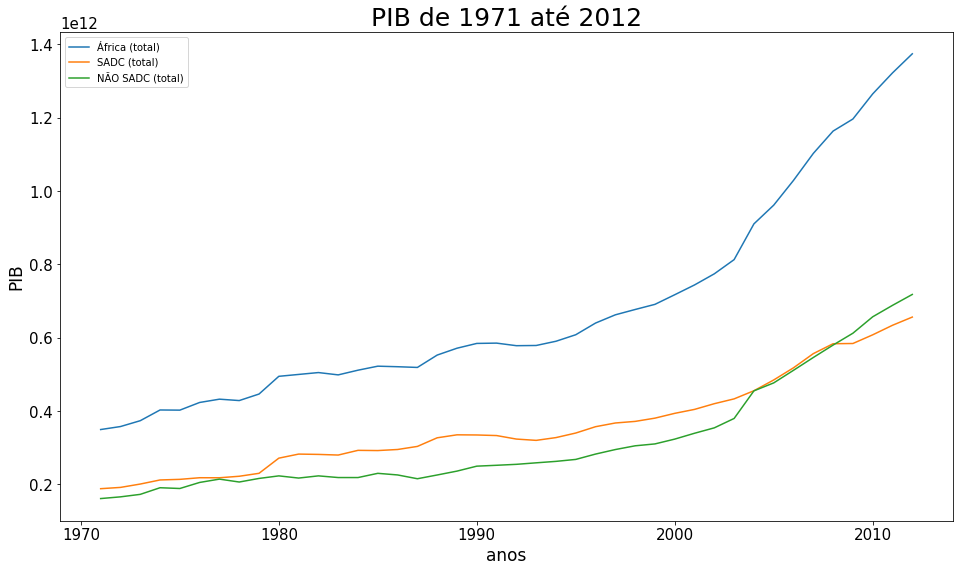

In [288]:
plt.plot(anos, soma_africa_anos_total, label="África (total)")
plt.plot(anos, soma_aus_anos_total, label="SADC (total)" )
plt.plot(anos, soma_nao_aus_anos_total, label="NÃO SADC (total)")
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB de 1971 até 2012")
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 17
plt.rcParams["lines.markersize"] = 15
plt.legend()
plt.show()

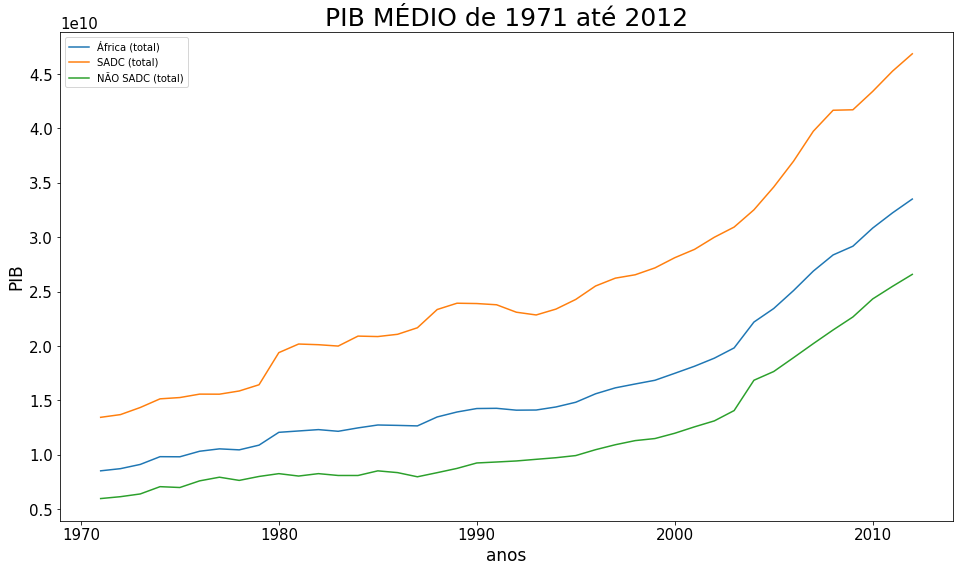

In [275]:
plt.plot(anos, soma_africa_anos_total/41, label="África (total)")
plt.plot(anos, soma_aus_anos_total/14, label="SADC (total)" )
plt.plot(anos, soma_nao_aus_anos_total/27, label="NÃO SADC (total)")
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB MÉDIO de 1971 até 2012")
plt.legend()
plt.show()

In [277]:
dados_af_nao_aus_retirada = dados_af_nao_aus.dropna()
dados_af_aus_retirada = dados_af_aus.dropna()
vida_af_nao_aus_retirada = vida_af_nao_aus.dropna()
vida_af_aus_retirada = vida_af_nao_aus.dropna()

In [299]:
af_aus_1972 = dados_af_aus_retirada[1990]
af_nao_aus_1972 = dados_af_nao_aus_retirada[1990]
af_aus_2010 = dados_af_aus_retirada[2010]
af_nao_aus_2010 = dados_af_nao_aus_retirada[2010]
vida_af_aus_2010 = vida_af_aus_retirada[2010]
vida_af_nao_aus_2010 = vida_af_nao_aus_retirada[2010]
vida_af_aus_1972 = vida_af_aus_retirada[1990]
vida_af_nao_aus_1972 = vida_af_nao_aus_retirada[1990]

af_aus_1972.rename("PIB 1990", inplace=True)
af_nao_aus_1972.rename("PIB 1990", inplace=True)
af_aus_2010.rename("PIB 2010", inplace=True)
af_nao_aus_2010.rename("PIB 2010", inplace=True)
vida_af_aus_2010.rename("ExpVida 2010", inplace=True)
vida_af_nao_aus_2010.rename("ExpVida 2010", inplace=True)
vida_af_aus_1972.rename("ExpVida 1990", inplace=True)
vida_af_nao_aus_1972.rename("ExpVida 1990", inplace=True)


country
Benin                       55.5
Burkina Faso                50.6
Burundi                     48.0
Cameroon                    58.5
Cape Verde                  67.8
Central African Republic    48.2
Chad                        53.3
Congo, Rep.                 54.1
Djibouti                    61.3
Eritrea                     52.4
Ethiopia                    46.6
Gabon                       59.5
Gambia                      61.6
Ghana                       58.8
Guinea                      52.0
Guinea-Bissau               49.2
Liberia                     49.9
Mali                        49.4
Niger                       47.1
Nigeria                     54.9
Rwanda                      49.1
Senegal                     57.5
Seychelles                  69.3
Sierra Leone                50.6
Sudan                       58.6
Togo                        57.4
Uganda                      49.2
Name: ExpVida 1990, dtype: float64

In [313]:
comp_1972_all.concac

,PIB 1990,ExpVida 1990
Benin,NaN,55.5
Botswana,5.320000e+09,NaN
Burkina Faso,NaN,50.6
Burundi,NaN,48.0
Cameroon,NaN,58.5
Cape Verde,NaN,67.8
Central African Republic,NaN,48.2
Chad,NaN,53.3
"Congo, Dem. Rep.",2.430000e+10,NaN
"Congo, Rep.",NaN,54.1


In [312]:
comp_2010_af_nao_aus = pd.concat([af_nao_aus_2010, vida_af_nao_aus_2010], axis=1)
comp_2010_af_aus = pd.concat([af_aus_2010, vida_af_aus_2010], axis=1)
comp_1972_af_nao_aus = pd.concat([af_nao_aus_1972, vida_af_nao_aus_1972], axis=1)
comp_1972_af_aus = pd.concat([af_aus_1972, vida_af_aus_1972], axis=1)
comp_1972_all = pd.concat([comp_1972_af_aus, comp_1972_af_nao_aus])


C:\Users\dorad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
C:\Users\dorad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
C:\Users\dorad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the fut

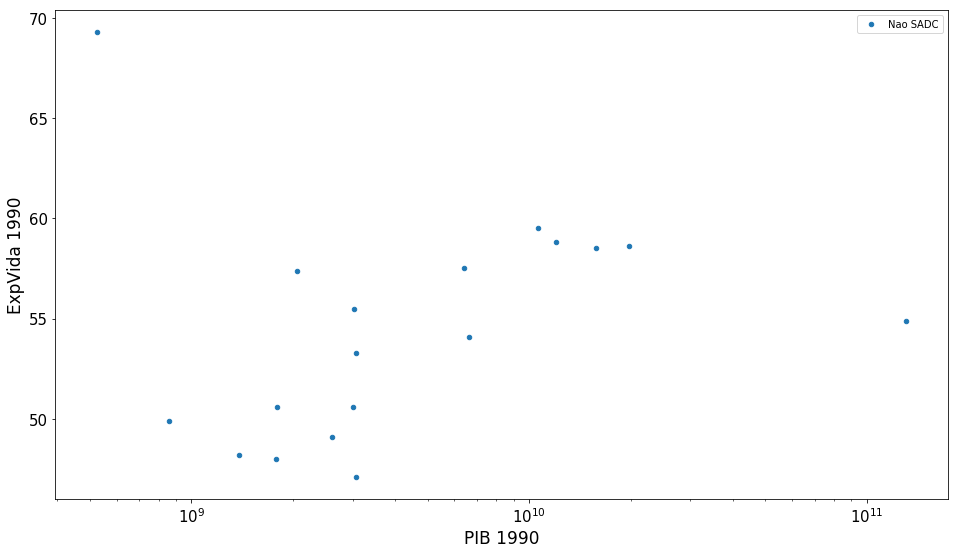

In [311]:
comp_1972_af_nao_aus.plot.scatter(x="PIB 1990", y="ExpVida 1990", logx=True, label="Nao SADC")
plt.show()

Ajuste linear entre X3 e X4:
Coeficiente linear: 48.61894027002943
Coeficiente angular: 3.8850981557887665e-11
Ajuste linear entre X3 e X4:
Coeficiente linear: 53.50776313525494
Coeficiente angular: 2.847612972381479e-11


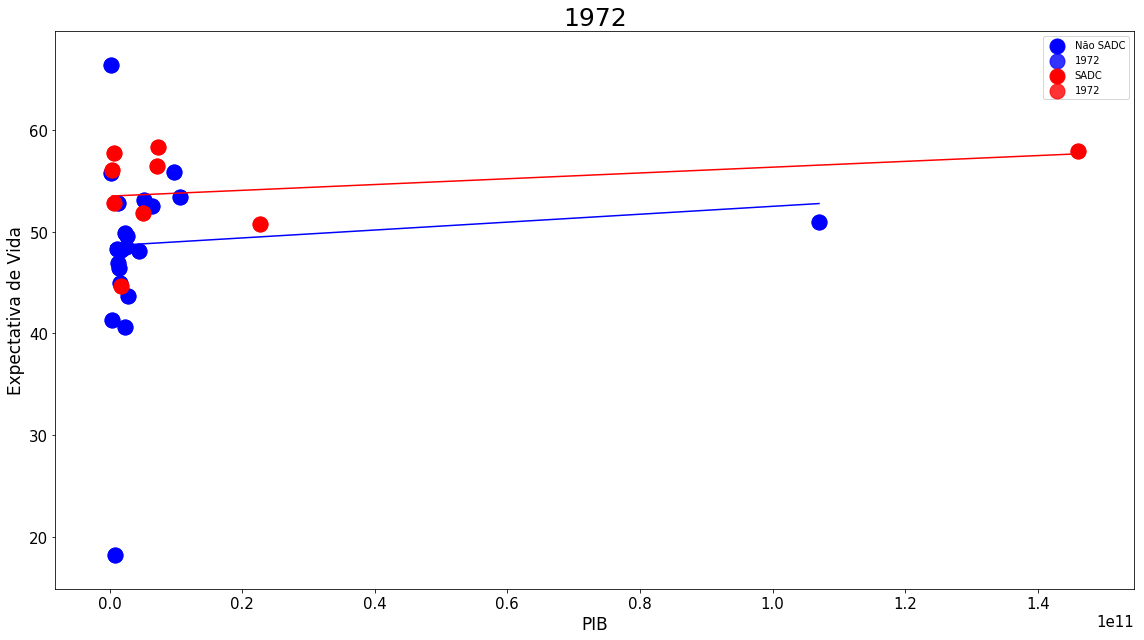

In [322]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('1972')
    plt.xlabel('PIB')
    plt.ylabel('Expectativa de Vida')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()

af_nao_aus_1972_2 = dados_af_nao_aus[1972]
vida_af_nao_aus_1972_2 = vida_af_nao_aus[1972]
af_aus_1972_2 = dados_af_aus[1972]
vida_af_aus_1972_2 = vida_af_aus[1972]


plt.scatter(af_nao_aus_1972_2, vida_af_nao_aus_1972_2, color="b", label="Não SADC")
reta(af_nao_aus_1972_2, vida_af_nao_aus_1972_2, "b")
plt.scatter(af_aus_1972_2, vida_af_aus_1972_2, color="r", label="SADC")
reta(af_aus_1972_2, vida_af_aus_1972_2, "r")
plt.legend()

In [ ]:
af_aus_1972 = dados_af_aus_retirada[1990]
af_aus_1972_sem_africa_sul = af_aus_1972.drop(labels = ['South Africa']) 
sem_africa = aus_anos_total.drop(labels=["South Africa"])

In [ ]:
aus_anos_total_t = aus_anos_total.T
medias_aus_anos_total_t = aus_anos_total.mean()
for pais in aus_anos_total_t.columns:
    plt.scatter(x=aus_anos_total_t.index, y=aus_anos_total_t[pais])
plt.plot(medias_aus_anos_total_t.index, medias_aus_anos_total_t, color="b")
plt.xlabel("anos")
plt.ylabel("pib")
plt.legend()

In [ ]:
aus_anos_total_t = sem_africa.T
medias_aus_anos_total_t = sem_africa.mean()
for pais in aus_anos_total_t.columns:
    plt.scatter(x=aus_anos_total_t.index, y=aus_anos_total_t[pais])
plt.plot(medias_aus_anos_total_t.index, medias_aus_anos_total_t, color="b")
plt.xlabel("anos")
plt.ylabel("pib")
plt.legend()
#sem a africa do sul

In [ ]:
sem_nigeria = nao_aus_anos_total.drop(labels=["Nigeria","Cameroon","Burundi"])
nao_aus_anos_total_t = sem_nigeria.T
medias_nao_aus_anos_total_t = sem_nigeria.mean()
for pais in nao_aus_anos_total_t.columns:
    plt.scatter(x=nao_aus_anos_total_t.index, y=nao_aus_anos_total_t[pais])
plt.plot(medias_nao_aus_anos_total_t.index, medias_nao_aus_anos_total_t, color="b")
plt.xlabel("anos")
plt.ylabel("pib")
plt.legend()

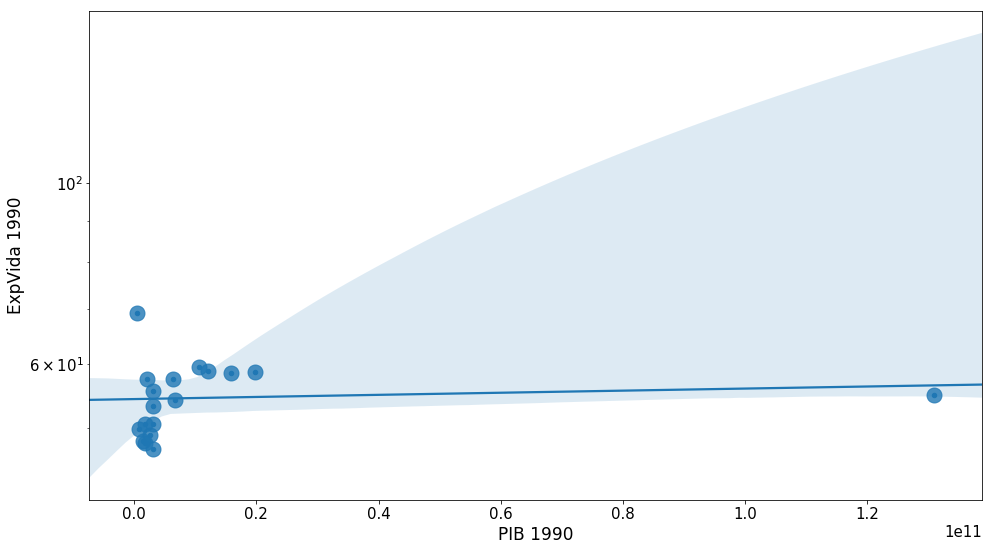

In [318]:
comp_1972_af_nao_aus.plot.scatter(x="PIB 1990", y="ExpVida 1990", logy=True)
sns.regplot(comp_1972_af_nao_aus['PIB 1990'], comp_1972_af_nao_aus['ExpVida 1990'])
plt.show()

In [ ]:
#dados_af_aus.boxplot(column=2010, by= "AF_AUS")

In [ ]:
#dados_af_aus.boxplot(column=2010, by= "AF_NAO_AUS")

## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados

> A ser respondida de acordo com a progressão do projeto!